In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# scikit-learn에서 보스턴 데이터셋이 삭제된 관계로, load_boston을 이용해 데이터셋을 불러올 수 없습니다.
# 그래서 데이터셋을 직접 불러온 뒤, 책에서 사용하는 데이터셋과 세팅이 같도록 csv 파일을 수정하였습니다.

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/BostonHousing.csv")
df.rename(columns={'medv': 'target'}, inplace=True)
df.columns = df.columns.str.upper()
print(df.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          B  LSTAT  TARGET  
501  391.99   9.67    22.4  
502  396.90   9.08    20.6  
503  396.90   5.64    23.9  
504  393.45   6.48    22.0  
505  396.90   7.88    11.9  


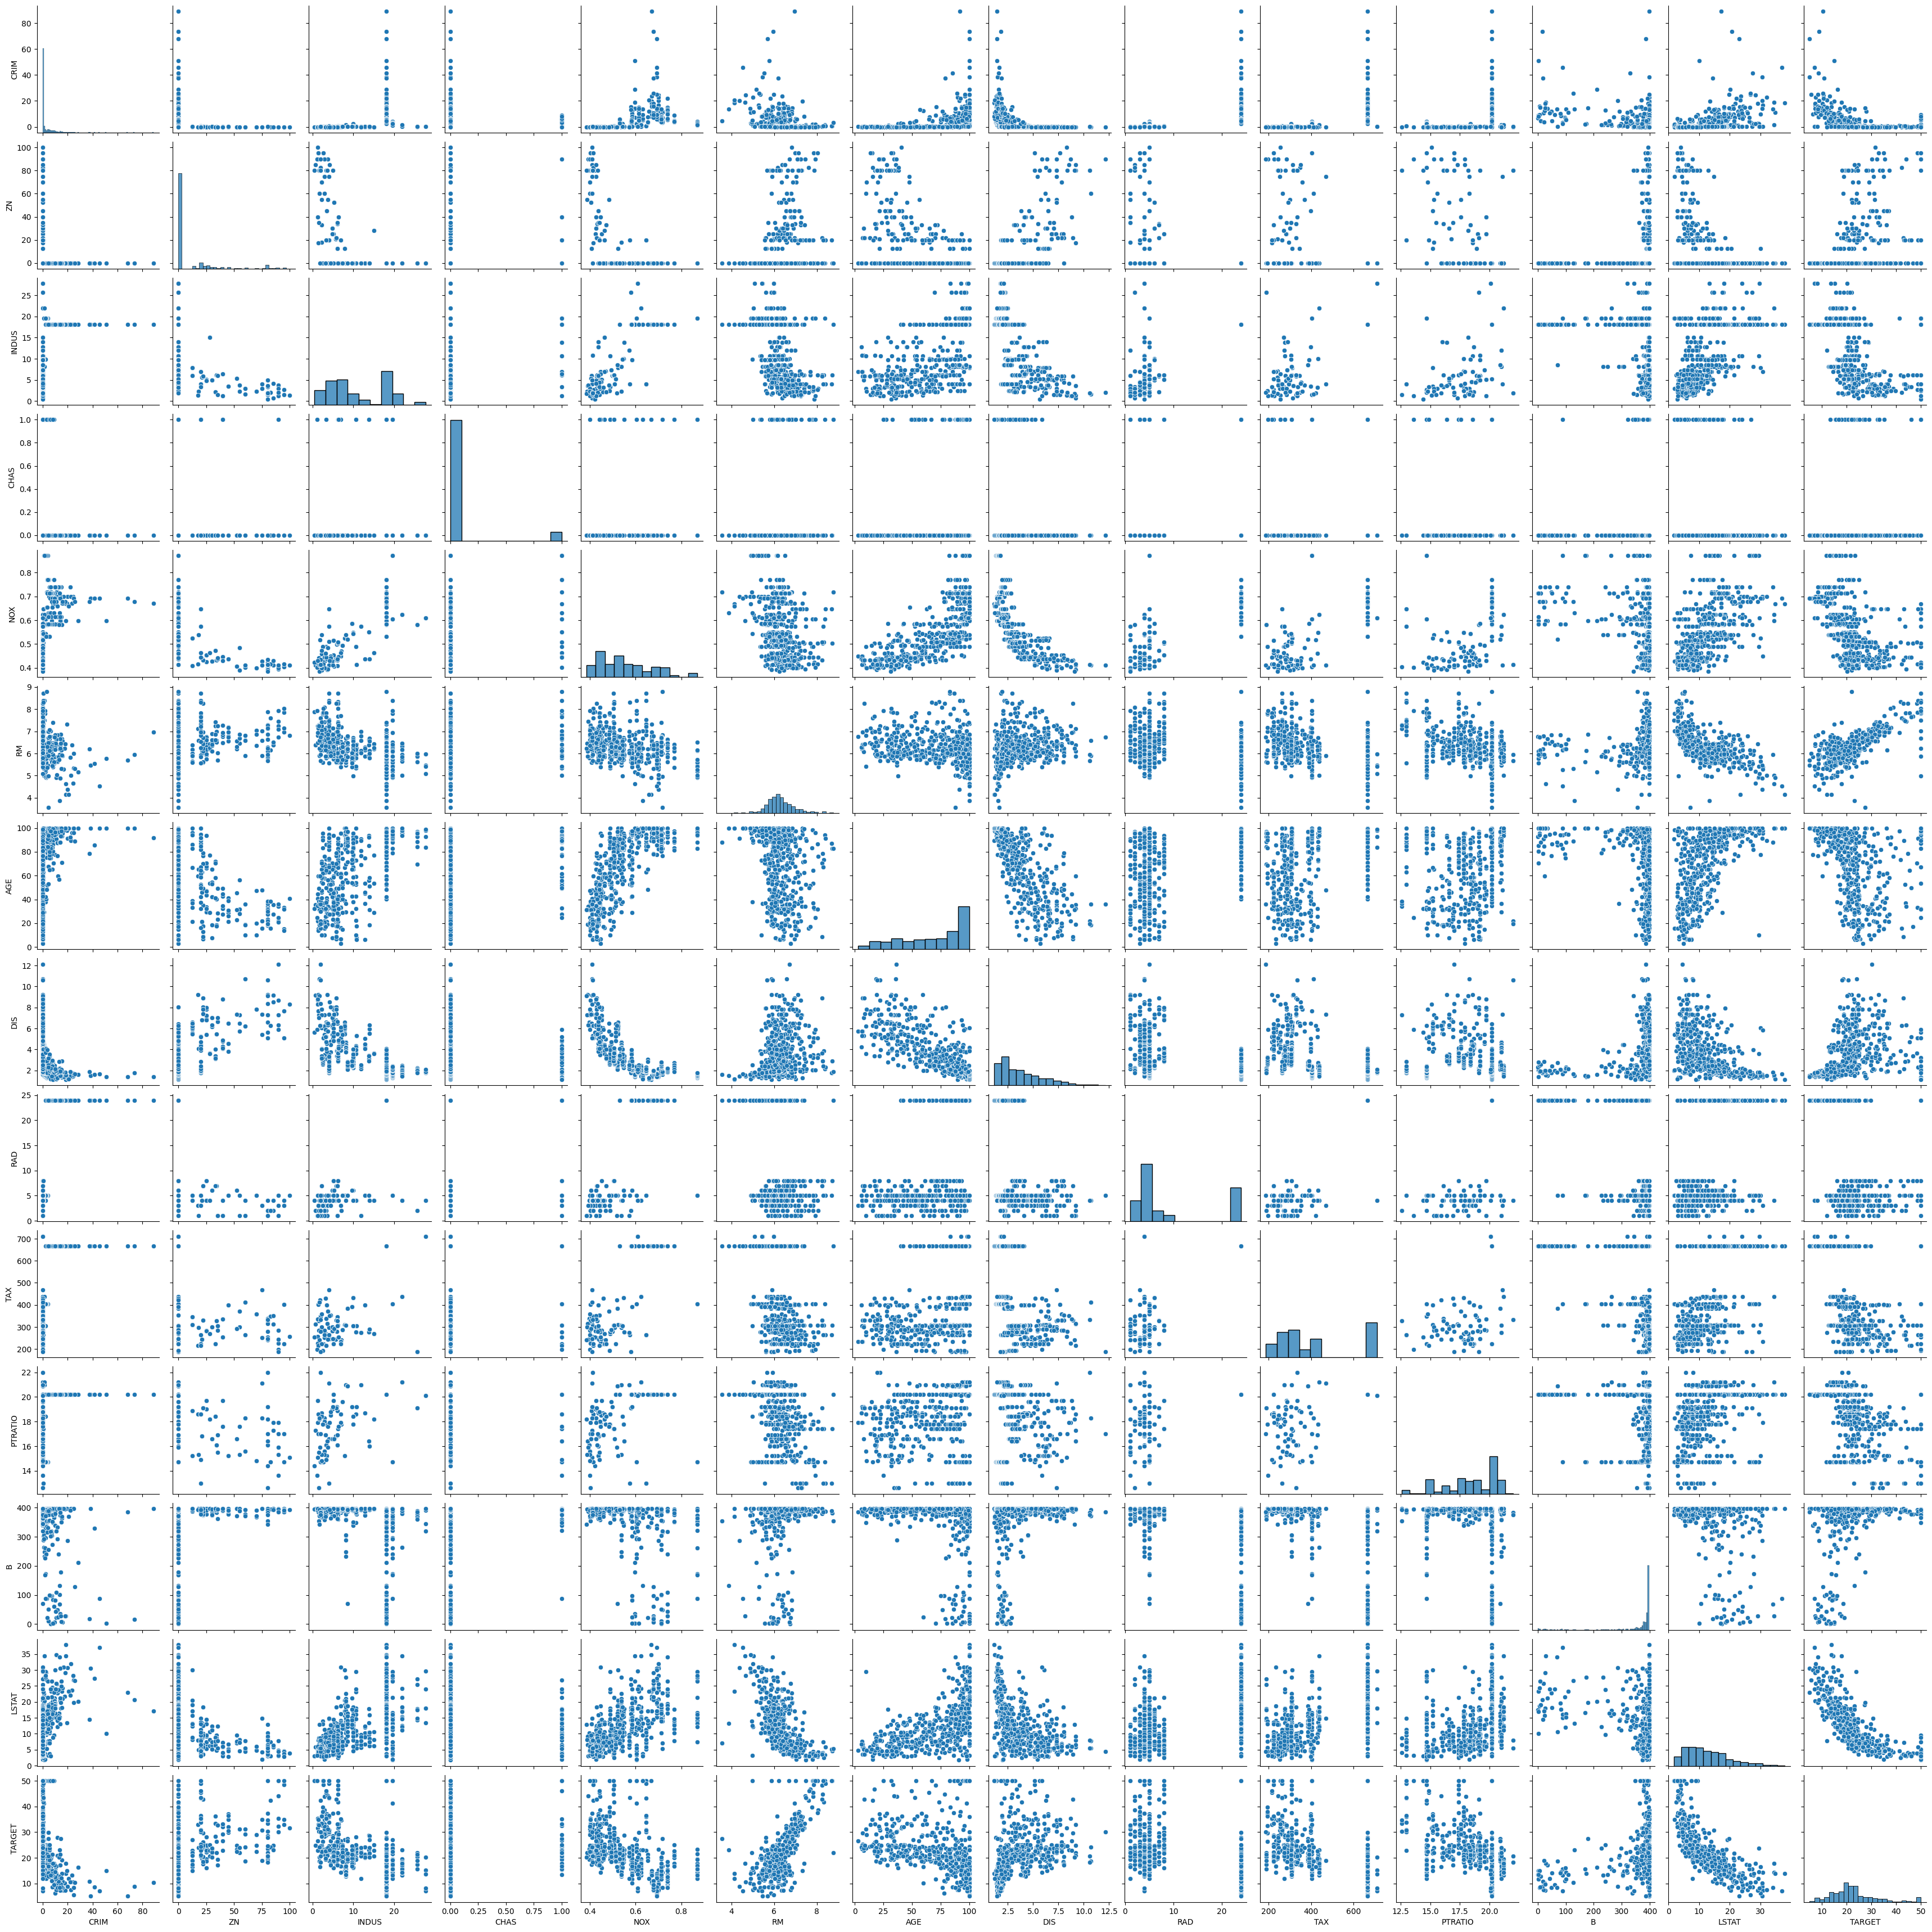

In [ ]:
# 페어플롯 그려보기

sns.pairplot(df)
plt.show()

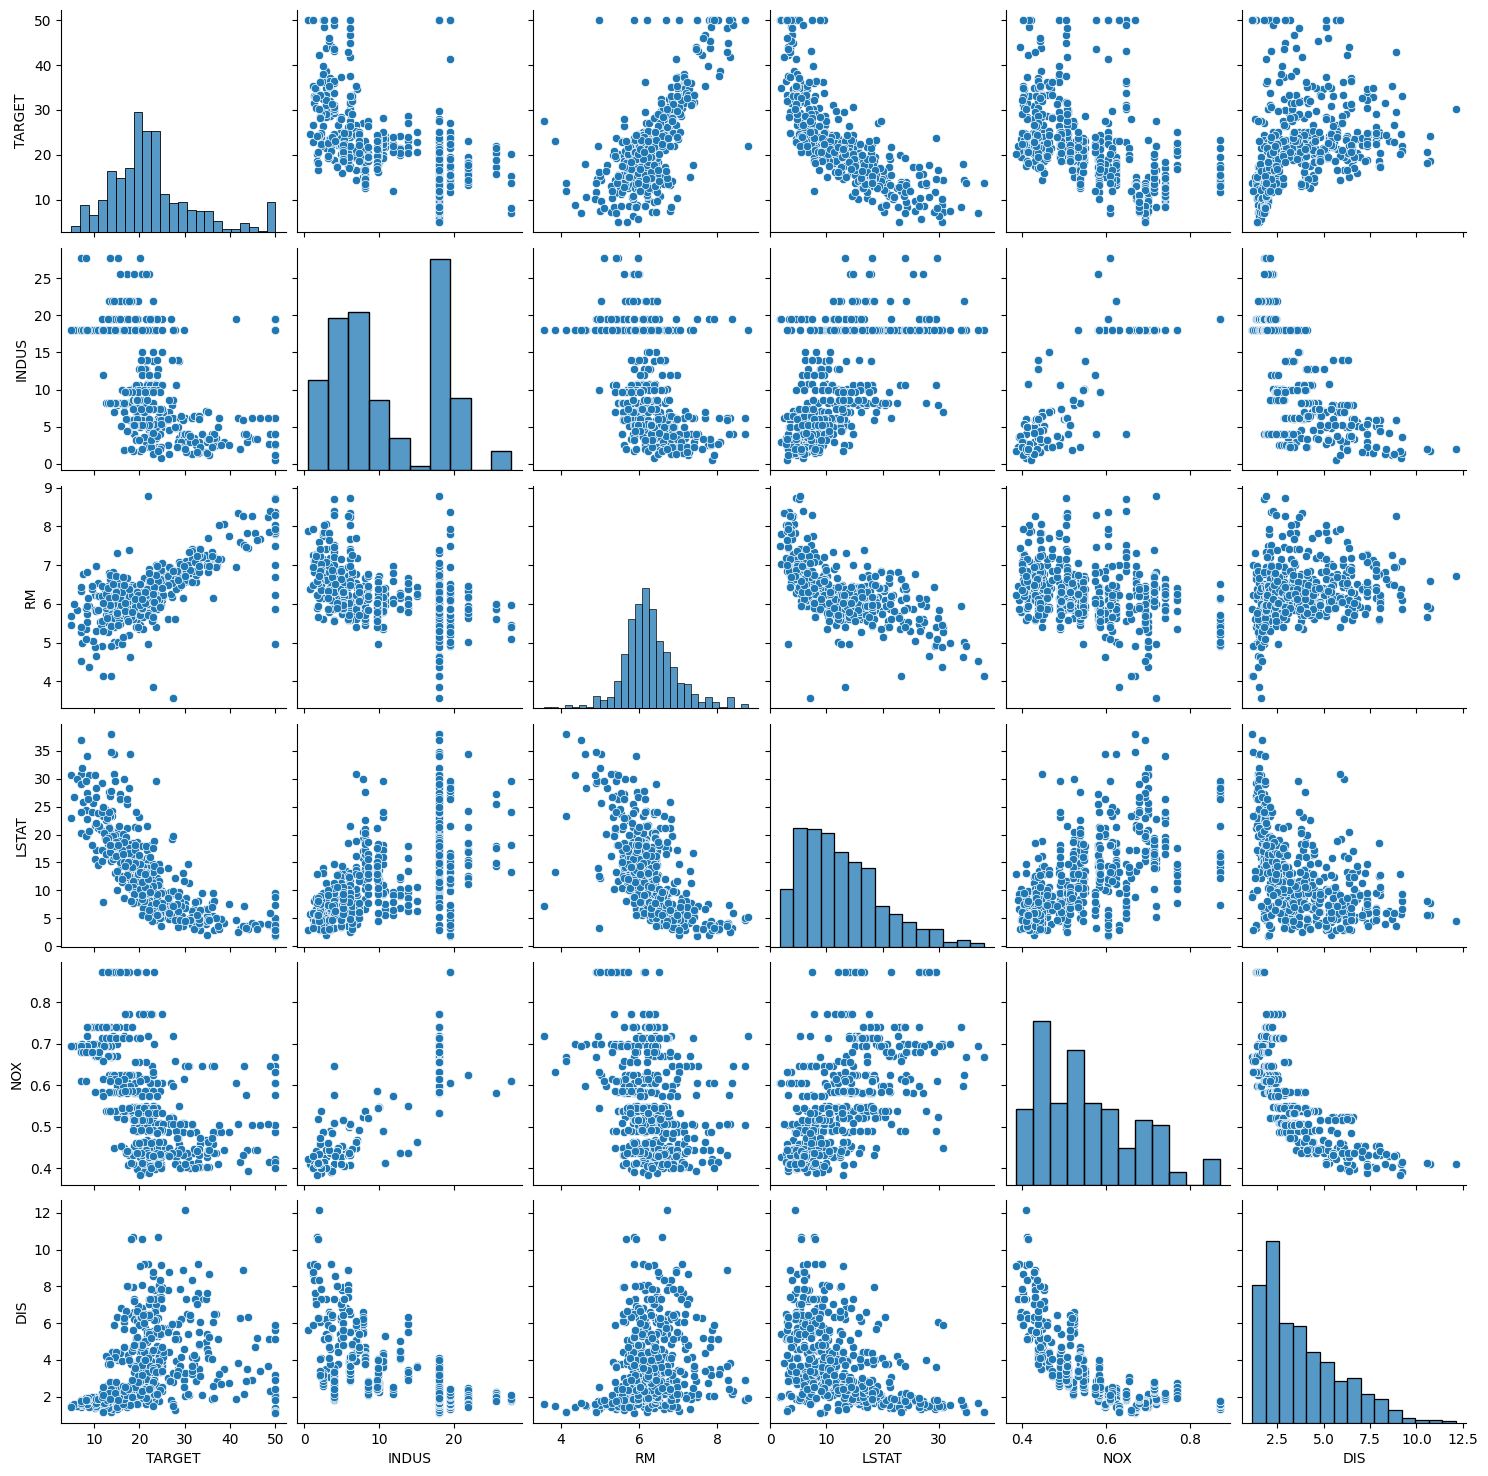

In [ ]:
# 선형성을 가진 속성들만 추려 다시 그려보기

cols = ["TARGET", "INDUS", "RM", "LSTAT", "NOX", "DIS"]
sns.pairplot(df[cols])
plt.show()

In [ ]:
data = torch.from_numpy(df[cols].values).float()
print(data.shape)

x = data[:, 1:] # 첫 번째 행 이외의 행들을 x로 설정
y = data[:, :1] # 첫 번째 행인 'TARGET'을 y로 설정
print(x.shape, y.shape)

torch.Size([506, 6])
torch.Size([506, 5]) torch.Size([506, 1])


In [ ]:
# 학습 설정
epochs = 2000   # 학습 반복 횟수
lr = 1e-3       # 학습률
interval = 100  # 학습 결과를 출력할 간격

# 선형 회귀 모델 설정
model = nn.Linear(x.size(-1), y.size(-1))           # 입력 차원은 x의 마지막 차원, 출력 차원은 y의 마지막 차원
optimizer = optim.SGD(model.parameters(), lr=lr)    # 옵티마이저 함수로 확률적 경사 하강법 사용
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [ ]:
# 모델 학습
for i in range(epochs):
    y_hat = model(x)                # 예측값 계산
    loss = F.mse_loss(y_hat, y)     # MSE 손실 함수 계산

    optimizer.zero_grad()           # 기울기 초기화
    loss.backward()                 # 역전파로 기울기 계산
    optimizer.step()                # 가중치 업데이트

    # 학습 진행 상황 출력
    if (i + 1) % interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 100: loss=4.5362e+01
Epoch 200: loss=3.8092e+01
Epoch 300: loss=3.4108e+01
Epoch 400: loss=3.1863e+01
Epoch 500: loss=3.0597e+01
Epoch 600: loss=2.9884e+01
Epoch 700: loss=2.9481e+01
Epoch 800: loss=2.9254e+01
Epoch 900: loss=2.9126e+01
Epoch 1000: loss=2.9053e+01
Epoch 1100: loss=2.9012e+01
Epoch 1200: loss=2.8988e+01
Epoch 1300: loss=2.8975e+01
Epoch 1400: loss=2.8967e+01
Epoch 1500: loss=2.8962e+01
Epoch 1600: loss=2.8959e+01
Epoch 1700: loss=2.8957e+01
Epoch 1800: loss=2.8956e+01
Epoch 1900: loss=2.8955e+01
Epoch 2000: loss=2.8954e+01


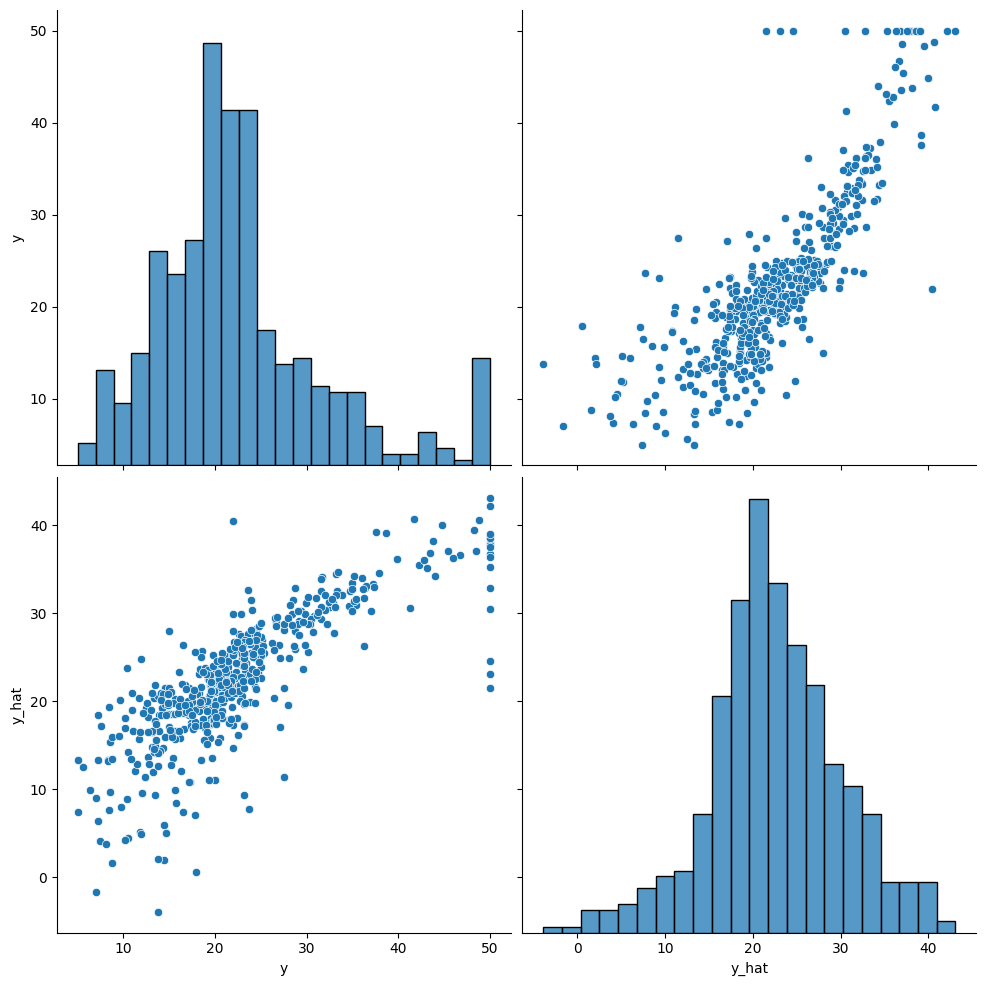

In [ ]:
# 예측값과 실제값을 DataFrame으로 결합하여 시각화
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
sns.pairplot(df, height=5)
plt.show()